In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv("SMSSpamCollection.tsv",sep="\t",names=["label","text"])
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.shape

(5572, 2)

In [9]:
for i in range(10):
    print(df.iloc[i,-1])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
U dun say so early hor... U c already then say...
Nah I don't think he goes to usf, he lives around here though
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
Even my brother is not like to speak with me. They treat me like aids patent.
As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
Had your mobile 11 months or more? U R entitl

In [10]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [11]:
sn = SnowballStemmer("english")

In [12]:
nltk.download('stopwords')
stop = stopwords.words ('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
nltk.download('punkt')
def clean_text(sms):
    sms = sms.lower()
    sms = re.sub('[^a-z0-9]',' ',sms)
    sms = nltk.word_tokenize(sms)
    sms = [t for t in sms if len(t) > 1]
    sms = [sn.stem(word) for word in sms if word not in stop]
    sms = ' '.join(sms)
    return sms

[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [14]:
clean_text("Get is .. are.. Playing they UNLIMITED <!!!>,,, ??? Free data play 100GB.. at Rs. 0")

'get play unlimit free data play 100gb rs'

In [15]:
df['clean_text'] = df['text'].apply(clean_text)

In [16]:
df.head()

,label,text,clean_text
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi great world l...
1,ham,Ok lar... Joking wif u oni...,ok lar joke wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entri wkli comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,dun say earli hor alreadi say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


In [17]:
# pip insatll wordcloud

In [18]:
from wordcloud import WordCloud

In [19]:
hamdata = df[df['label'] == 'ham']['clean_text']
spamdata = df[df['label'] == 'spam']['clean_text']

In [20]:
' '.join(hamdata)

'go jurong point crazi avail bugi great world la buffet cine got amor wat ok lar joke wif oni dun say earli hor alreadi say nah think goe usf live around though even brother like speak treat like aid patent per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun gon na home soon want talk stuff anymor tonight cri enough today search right word thank breather promis wont take help grant fulfil promis wonder bless time date sunday oh watch eh rememb spell name yes naughti make wet fine way feel way gota serious spell name go tri month ha ha joke pay first lar da stock comin aft finish lunch go str lor ard smth lor finish ur lunch alreadi ffffffffff alright way meet sooner forc eat slice realli hungri tho suck mark get worri know sick turn pizza lol lol alway convinc catch bus fri egg make tea eat mom left dinner feel love back amp pack car let know room ahhh work vagu rememb feel like lol wait still clear sure sarcast want live us yeah got

In [21]:
def wordCloud(data):
    words = " ".join(data)
    wc = WordCloud(background_color='white')
    wc = wc.generate(words)

    plt.figure(figsize=(10,8))
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

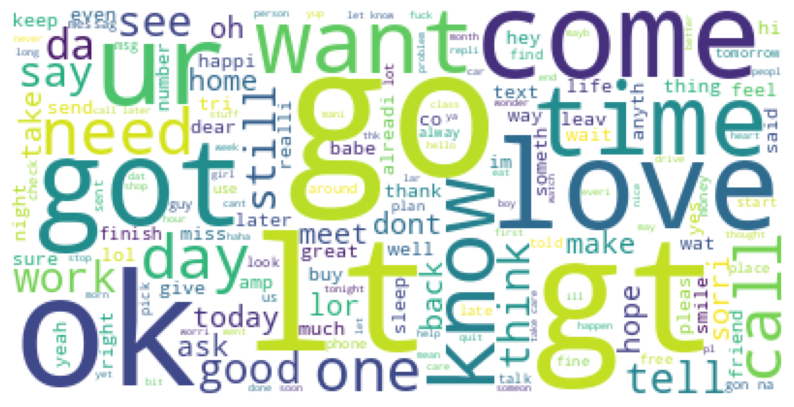

In [22]:
wordCloud(hamdata)

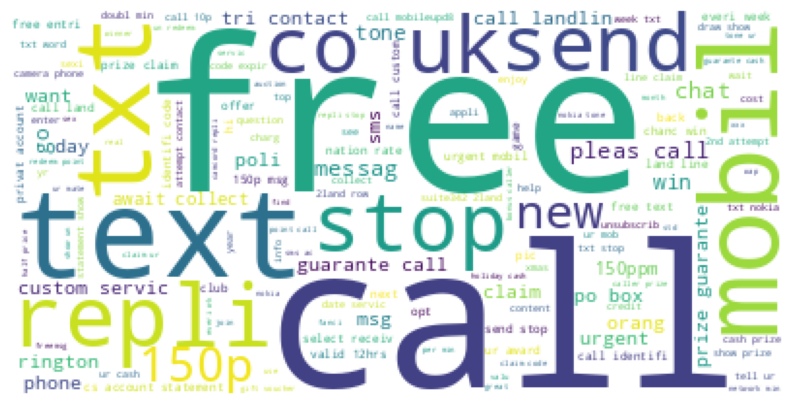

In [23]:
wordCloud(spamdata)

In [24]:
# convert text in numeric form


In [25]:
from sklearn.feature_extraction.text import CountVectorizer

In [26]:
cv = CountVectorizer(max_features=5000)

In [28]:
X = cv.fit_transform(df['clean_text']).toarray()

In [29]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [35]:
y = pd.get_dummies(df['label'])

In [36]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False
